In [2]:
import pandas as pd 
df=pd.read_csv('../complexe.csv')

In [ ]:
def bonne_periode(row):
    """S'assure que les coordonnees sont du bon coté de la patinoire, retourne -x sinon

    Args:
        row (Dataframe): Dataframe de base

    Returns:
        _type_: _description_
    """
    x= row['x']
    period = row['period']
    powerplayhome = row['powerplayHome']
    powerplayaway = row['powerplayAway']
    # L'équipe à domicile commence du côté positif de x
    if powerplayhome or not powerplayaway: # Equipe Domicile
                return -x if (period % 2 == 1 and x<0) or (period % 2 == 0 and x>0)  else x
    else:  # Équipe visiteuse
            return -x if (period % 2 == 1 and x>0) or (period % 2 == 0 and x<0) else x
df['x']=df.apply(lambda row:bonne_periode(row),axis=1)

In [ ]:
def invalid_coord(df):
    # Conditions ou les coordonnees sont fausses
    conditions = {
    "home_powerplay_odd": (df['powerplayHome'] == True) & (df['period'] % 2 == 1) & (df['x'] > 0),
    "away_no_powerplay_even": (df['powerplayAway'] == False) & (df['period'] % 2 == 0) & (df['x'] < 0),
    "away_powerplay_even": (df['powerplayAway'] == True) & (df['period'] % 2 == 1) & (df['x'] > 0),
    "home_no_powerplay_even": (df['powerplayHome'] == False) & (df['period'] % 2 == 0) & (df['x'] < 0),

    }
    #Dataframe avec ces coordonnees
    invalid_coordinates = df[conditions["home_powerplay_odd"] | 
                            conditions["away_powerplay_even"] | 
                            conditions["home_no_powerplay_even"] | 
                            conditions["away_no_powerplay_even"]]

    print(invalid_coordinates)

(array([  1919.,   3744.,   7979.,  47583.,  89278.,  98284., 127414.,
        170629.,  95226.,   5606.]),
 array([  0.        ,  10.21077862,  20.42155724,  30.63233586,
         40.84311447,  51.05389309,  61.26467171,  71.47545033,
         81.68622895,  91.89700757, 102.10778619]),
 <BarContainer object of 10 artists>)

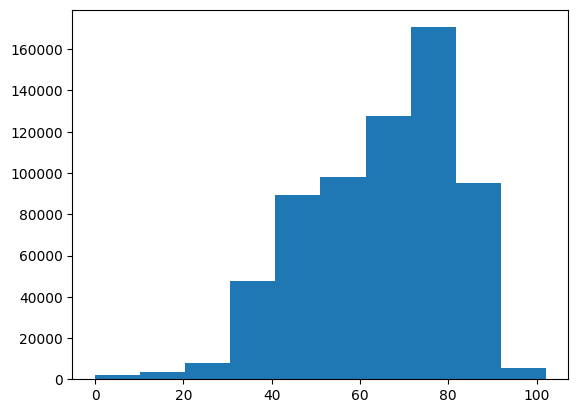

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def rinkdistance(x):
    """Retourne la distance euclidienne entre des coordonnees (x,y) et le centre
    Args:
        x (np.array): (x,y)

    Returns:
        _type_: float
    """
    return np.linalg.norm(np.array(x) - np.array([0, 0]))
df['rinkdistance'] = df[['x', 'y']].apply(lambda x: rinkdistance(x), axis=1)
plt.hist(df['rinkdistance'])


In [47]:
import numpy as np

def shots_team_distance(df):
    """Prend le dataframe et retourne le taux de tir moyen par heure de la ligue par emplacement et la différence du taux de tir par heure pour chaque équipe 
    avec la moyenne par distance

    Args:
        df (_type_): _description_

    Returns:
        _type_: _description_
    """
    # Calcul du nombre de tir par distance
    shot_per_distance=df.groupby('distance_bins').size()
    # Chaque match dure une heure, temps total dheures jouees par toutes les teams sur une saison
    total_hours=len(df.groupby('gameId'))
    #Nombre de shot par heure pour chaque distance 
    shot_per_hour_bydistance=(shot_per_distance/(total_hours*2))
    #Nombre de shot sur une saison par team
    shot_per_team=df.groupby('teamId').size()
    #Nombre de game joué par team = nombre dheure par team
    time_total_per_team=df.groupby('teamId')['gameId'].nunique()
    #Nombre de shot par team et par distance
    number_of_shots_team_distance=df.groupby(['teamId','distance_bins']).size()
    #shot_per_hour_byteam=shot_per_team/time_total_per_team
    shot_per_hour_per_distance_per_team=number_of_shots_team_distance/time_total_per_team
    diff_per_distance=shot_per_hour_per_distance_per_team-shot_per_hour_bydistance
    return diff_per_distance.reset_index(name='diff_per_distance')



In [197]:

import matplotlib.image as mpimg
# Chatgpt
def map_coordinates(x, y, rink_width, rink_length, img_width, img_height):
    x_pixel = (x / (rink_length)) * (img_width ) 
    y_pixel = (y / (rink_width) * (img_height) )
    return x_pixel, y_pixel


img = mpimg.imread('../figures/nhl_rink.png')
img_height, img_width,_ = img.shape
# Exemple d'application
rink_length = 200  # longueur de la patinoire en pieds
rink_width = 85    # largeur de la patinoire en pieds
df[['x_pixel', 'y_pixel']] = df.apply(lambda x: map_coordinates(x['coordx'], x['coordy'], rink_width//2, rink_length//2, img_width//2, img_height//2),axis=1,result_type='expand')

,Unnamed: 0,season,gameId,eventId,period,timeInPeriod,eventType,teamId,shooter,goalie,...,powerplayAway,coordinates,result,goal,x,y,distance,coordx,coordy,distance_bins
0,0,20162017,2016020001,8,1,01:11,shot-on-goal,10,Mitch Marner,Craig Anderson,...,False,"['-77', '5']",no goal,0,-77.0,5.0,13.000000,22.0,47.0,"(10.0, 20.0]"
1,1,20162017,2016020001,11,1,02:53,shot-on-goal,9,Chris Kelly,Frederik Andersen,...,False,"['86', '13']",no goal,0,86.0,13.0,13.341664,185.0,55.0,"(10.0, 20.0]"
2,2,20162017,2016020001,15,1,04:01,shot-on-goal,9,Cody Ceci,Frederik Andersen,...,False,"['23', '-38']",no goal,0,23.0,-38.0,76.157731,122.0,4.0,"(70.0, 80.0]"
3,3,20162017,2016020001,16,1,04:46,shot-on-goal,9,Erik Karlsson,Frederik Andersen,...,False,"['33', '-15']",no goal,0,33.0,-15.0,57.974132,132.0,27.0,"(50.0, 60.0]"
4,4,20162017,2016020001,24,1,06:46,shot-on-goal,10,Martin Marincin,Craig Anderson,...,False,"['-34', '28']",no goal,0,-34.0,28.0,61.717096,65.0,70.0,"(60.0, 70.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647674,647674,20232024,2023030417,252,3,12:57,shot-on-goal,22,Zach Hyman,Sergei Bobrovsky,...,False,"['85', '1']",no goal,0,85.0,1.0,4.123106,184.0,43.0,"(-0.001, 10.0]"
647675,647675,20232024,2023030417,1183,3,14:25,shot-on-goal,13,Vladimir Tarasenko,Stuart Skinner,...,False,"['-53', '-27']",no goal,0,-53.0,-27.0,45.000000,46.0,15.0,"(40.0, 50.0]"
647676,647676,20232024,2023030417,1189,3,15:23,shot-on-goal,13,Aleksander Barkov,Stuart Skinner,...,False,"['-59', '-29']",no goal,0,-59.0,-29.0,41.725292,40.0,13.0,"(40.0, 50.0]"
647677,647677,20232024,2023030417,1193,3,15:48,shot-on-goal,22,Darnell Nurse,Sergei Bobrovsky,...,False,"['57', '-26']",no goal,0,57.0,-26.0,41.231056,156.0,16.0,"(40.0, 50.0]"


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc

# Read the image
fig,ax=plt.subplots(figsize=(50,10))
img = mpimg.imread('../figures/nhl_rink.png')
height, width,_ = img.shape

# Cut the image in half
width_cutoff = width // 2
s1 = img[:, :width_cutoff]
s2 = img[:, width_cutoff:]
ax.scatter(df['x_pixel'][(df['season']==20162017) & (df['teamId']==1)],df['y_pixel'][(df['season']==20162017) & (df['teamId']==1)], s=100,c='#ea6969',alpha=.7,label='1')
plt.gca().invert_yaxis()
plt.imshow(s2)
plt.show()
plt.hist(df['coordx'])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc
from sklearn import preprocessing
# Read the image
fig,ax=plt.subplots(figsize=(50,10))
img = mpimg.imread('../figures/nhl_rink.png')
height, width,_ = img.shape

# Cut the image in half
width_cutoff = width // 2
s1 = img[:, :width_cutoff]
s2 = img[:, width_cutoff:]

ax.scatter(df['coordx'][(df['season']==20162017) & (df['teamId']==1)],df['coordy'][(df['season']==20162017) & (df['teamId']==1)], s=100,c='#ea6969',alpha=.7,label='1')
plt.gca().invert_yaxis()
plt.imshow(s2,extent=[0,1,0,1])
plt.show()
plt.hist(df['xnoormalized'])
df.drop('xnoormalized')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Read the image
fig,ax=plt.subplots(figsize=(50,10))
img = mpimg.imread('../figures/nhl_rink.png')
height, width,_ = img.shape

# Cut the image in half
width_cutoff = width // 2
s1 = img[:, :width_cutoff]
s2 = img[:, width_cutoff:]
sns.kdeplot(df,x=['rinkdistance'],y=['distance_bins'],data=shots_team_distance(df))
#ax.scatter(df['coordx'][(df['season']==20162017) & (df['teamId']==1)],df['coordy'][(df['season']==20162017) & (df['teamId']==1)], s=100,c='#ea6969',alpha=.7)
plt.imshow(s2)
plt.show()